## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

## Data Collection and Processing

In [2]:
# Loading the data from CSV file to pandas dataframe
calories_df = pd.read_csv("/content/calories.csv")
exercise_df = pd.read_csv("/content/exercise.csv")

In [3]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
exercise_df.replace({"Gender":{"male":0,"female":1}},inplace=True) # The data on the gender column needs to be transformed from "Male" and "Female" to 0 and 1 so that our model can run properly.

In [6]:
#Both tables were joined using concat 
df = pd.concat([exercise_df,calories_df["Calories"]],axis=1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
#nr of columns and rows
df.shape

(15000, 9)

In [9]:
#Some more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [10]:
#There are no empty rows so there is no need to use mean, median, or any other filler to fix the dataframe
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Analysis and Visualization

In [11]:
# Dataframe overview
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


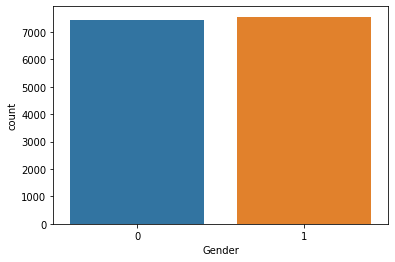

In [12]:
sns.countplot(df["Gender"]) # The values for male and female are very close to each other so the dataset is well distributed in this category

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


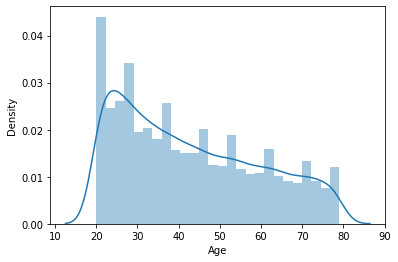

In [13]:
sns.distplot(df["Age"]) # The distribution of age is positively skewed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


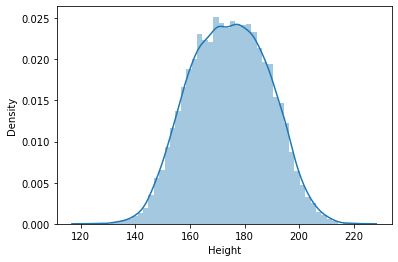

In [14]:
sns.distplot(df["Height"]) # The distribution of height is close to a normal distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


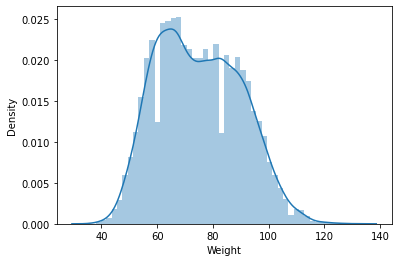

In [15]:
sns.distplot(df["Weight"]) # The distribution of weight is close to normal, with slight positive skewness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


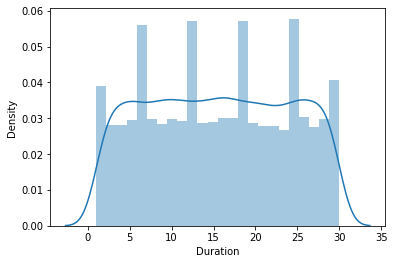

In [16]:
sns.distplot(df["Duration"]) # The distribution of exercise duration is close to a uniform distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


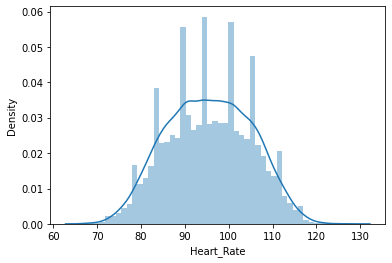

In [17]:
sns.distplot(df["Heart_Rate"]) # The distribution of heart rate is close to normal

In [18]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
correlation = df.corr()

In [20]:
correlation # Unsurprisingly, the variables "Exercise duration", "Heart rate" and "Body temperature" have a high correlation with Calories burned.

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


## Defining the features and target & Splitting data into Train and Test data

In [21]:
# Features
X = df.drop(columns=["User_ID","Calories"], axis=1)
# Target
y = df["Calories"]

In [22]:
# Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Training a Gradient Boost model from sklearn (XGBoost Regressor)

In [23]:
# Loading and fitting the model
calorie_model = XGBRegressor() 
calorie_model.fit(X_train.to_numpy(),y_train.to_numpy())
# Note how I used the method .to_numpy to convert the dataframes into numpy arrays.
# This is done to prevent a prediction error when using XGBoost model, which will expect a numpy array as input.

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
# Evaluating our model performance (prediction) on test data
prediction = calorie_model.predict(X_test.to_numpy())
prediction

array([172.79109 , 189.16483 ,  50.48573 , ...,  28.199965, 195.52637 ,
       137.94136 ], dtype=float32)

In [25]:
# Now we can calculate the error our model is making by comparing it with the real values (y_test)
# I will use Mean Absolute Error as the error metric as per usual when evaluating model performance in regression analysis. 
# MAE (Mean Absolute Error) is the average absolute error between actual and predicted values.
# metrics has been imported from sklearn

mae = metrics.mean_absolute_error(y_test,prediction)
mae # We get MAE = 2.6, which is pretty good considering our dataset and range of values that calories can take (ranges from 1 to 314 in full dataset).

1.5449008239474562

# Allowing for user input

In [26]:
calorie_model.get_booster().feature_names

In [27]:
user_input = (0,27,176,76,25,120,40)

# Transforming user input data into a numpy array
user_input_array = np.asarray(user_input)

# We need to reshape the array so that we can use it in our model
user_input_reshaped = user_input_array.reshape(1,-1)
user_input_reshaped

# Calculating prediction based on user input
user_input_prediction = calorie_model.predict(user_input_reshaped)
user_input_prediction

array([198.40332], dtype=float32)

## Saving the trained model

In [28]:
!pip show xgboost | grep Version

Version: 1.7.1


In [29]:
#pip install --upgrade xgboost%

In [30]:
## Using JobLib to save and load model
# Saving the trained model using Joblib as a .sav
#import joblib
#joblib.dump(calorie_model, "trained_model2.sav")
# Loading the saved j.sav model
#loaded_model = joblib.load("trained_model2.sav")

In [32]:
## Saving and loading model as JSON file
# Saving the trained model as a json file
#calorie_model.save_model('trained_model1.json')
# Loading the saved json model
#loaded_model = XGBRegressor()
#loaded_model.load_model('trained_model1.json')

In [34]:
# Saving the trained model as a pickle file
pickle.dump(calorie_model, open('trained_model.pkl', 'wb'))
# Loading the saved pickle model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [36]:
# Adjusting our model prediction framework to work with out loaded model

user_input = (0,27,176,76,25,120,40)

# Transforming user input data into a numpy array
user_input_array = np.asarray(user_input)

# We need to reshape the array so that we can use it in our model
user_input_reshaped = user_input_array.reshape(1,-1)

# Calculating prediction based on user input
user_input_prediction = loaded_model.predict(user_input_reshaped)

user_input_prediction

array([198.40332], dtype=float32)

# Connection to Github

In [46]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [47]:
%cd /content/gdrive/MyDrive/Github/CaloriePredictor

/content/gdrive/MyDrive/Github/CaloriePredictor


In [39]:
#!git pull

In [40]:
#!ssh-keygen -t ed25519 -C "pmpmchaves@gmail.com"

In [41]:
#!eval "$(ssh-agent -s)"

In [42]:
#!ssh -add ~/.ssh/id_ed25519

In [52]:
#!git config --global user.email "pmpmchaves@gmail.com"
#!git config --global user.name "pmpmchaves"

In [53]:
#!git commit -m "Save & Load Model code completed"

[main b36c1eb] Save & Load Model code completed
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Calorie_Counter_Machine_Learning_Project.ipynb (86%)


In [57]:
#!git remote rm origin
#!git remote add origin 'git@github.com:pmpmchaves/CaloriePredictor.git'

In [59]:
#!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-cd305013


In [61]:
#!ssh-keygen

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:V1L269T5cOiWQL2LkxpQgSrNtz1w0EJZOc9dUEszQBY root@1c1a71d72ee3
The key's randomart image is:
+---[RSA 2048]----+
|       ..=o.+E+*.|
|        = ++.o. =|
|     o . oo+o.oo |
|    . + o..+o .=.|
|     . .S=. . *.o|
|        .oo  B =.|
|          ..+ * .|
|           o o   |
|          .      |
+----[SHA256]-----+


In [68]:
%cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQDPrG/dOAVpVxwitupd/0dZQ6vLWArLTauw22IXlswgfAS7BnYoCd1zfc5Ag6ZQUUejm6uhhblhydJVeZOmcLPFc5TQkOf7gYHNO/h0J1aisGSlNo8RWkzXplMUxTrJ13nArhyjCj95Cv7aGU+OO5h3nyo1tpGL58/gOZ+9BoeOj2NgQCbgsVM9vwj6/HVpD/rEs/0rWL5CZYjiNQ4qaMNqNuAwyLFO45ld1RN73pxYJUHkLXFquGi9+YwzsMzVQrd4vN+nS87Arkcn96ATuxbQLT9ZptX3tfp++4gS8xjspoBwxGCrit7jHsDVeYpE4ehMS+oyVqDy0lxVcFIIO8cD root@1c1a71d72ee3


In [71]:
%cd /content/gdrive/MyDrive/Github/CaloriePredictor

/content/gdrive/MyDrive/Github/CaloriePredictor


In [86]:
!git branch -c temp

In [93]:
!git fetch origin
!git reset --hard origin/main

HEAD is now at 8202fb0 Previous model was corrupted


In [106]:
!git add Calorie_Counter_Machine_Learning_Project.ipynb

In [108]:
!git commit -m "Updating JN file"



[main 8c4f8fb] Updating JN file
 1 file changed, 1 insertion(+), 2360 deletions(-)
 rewrite Calorie_Counter_Machine_Learning_Project.ipynb (98%)


In [110]:
!git checkout temp

Switched to branch 'temp'
Your branch is up to date with 'origin/main'.


In [117]:
!git status

On branch temp
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
